# K-means clustering on the Iris flower dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data and plot somes features

In [35]:
data = pd.read_csv('iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
data['species'] = data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

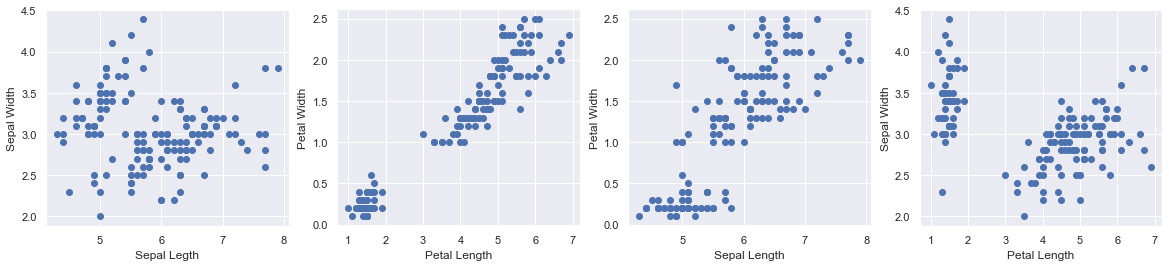

In [24]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Legth')
plt.ylabel('Sepal Width')

plt.subplot(1, 4, 2)
plt.scatter(data['petal_length'], data['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 4, 3)
plt.scatter(data['sepal_length'], data['petal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 4, 4)
plt.scatter(data['petal_length'], data['sepal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

plt.show()

## Standardisation and Clustering using the Elbow method for parameter k

In [51]:
from sklearn import preprocessing

x = data.copy()
x = x.drop(['species'], axis=1)
x_scaled = preprocessing.scale(x)

C:\Users\della\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within-Cluster Sum of Squares')

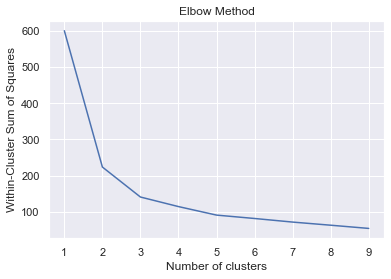

In [52]:
from sklearn.cluster import KMeans

wcss = []
number_of_clusters_max = 10

for i in range (1, number_of_clusters_max):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, number_of_clusters_max), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')

In [ ]:
number_of_clusters = 3
kmeans = KMeans(number_of_clusters)
kmeans.fit(x_scaled)

clusters = x.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(x_scaled)

## Plot k-means clustering and expected clustering

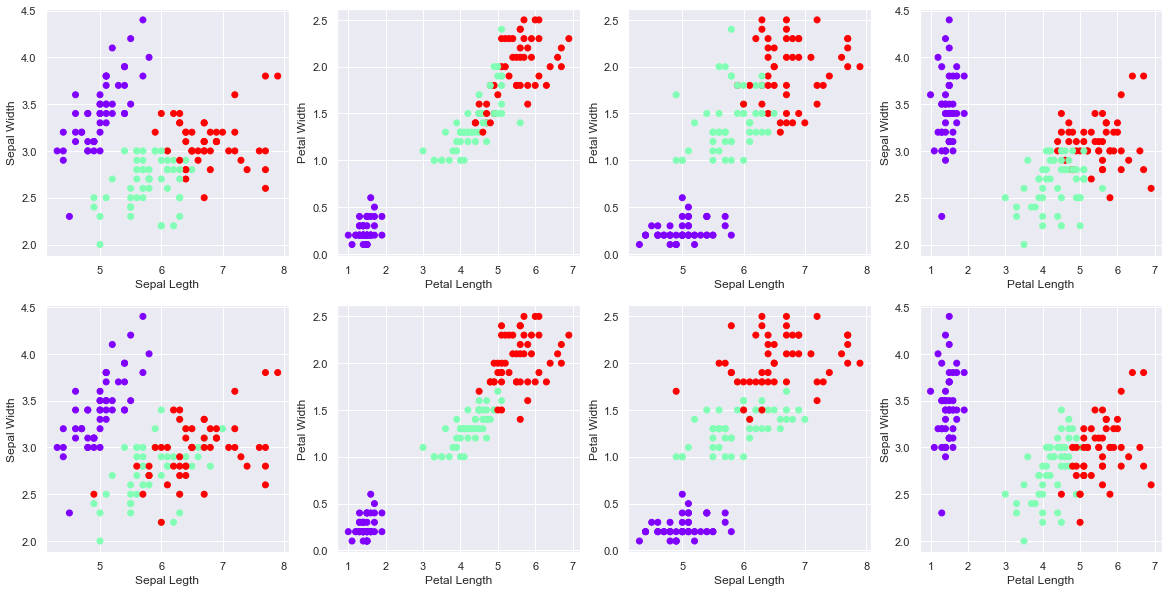

In [59]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.scatter(data['sepal_length'], data['sepal_width'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Sepal Legth')
plt.ylabel('Sepal Width')

plt.subplot(2, 4, 2)
plt.scatter(data['petal_length'], data['petal_width'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 4, 3)
plt.scatter(data['sepal_length'], data['petal_width'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 4, 4)
plt.scatter(data['petal_length'], data['sepal_width'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

plt.subplot(2, 4, 5)
plt.scatter(data['sepal_length'], data['sepal_width'], c=data['species'], cmap='rainbow')
plt.xlabel('Sepal Legth')
plt.ylabel('Sepal Width')

plt.subplot(2, 4, 6)
plt.scatter(data['petal_length'], data['petal_width'], c=data['species'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 4, 7)
plt.scatter(data['sepal_length'], data['petal_width'], c=data['species'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 4, 8)
plt.scatter(data['petal_length'], data['sepal_width'], c=data['species'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

plt.show()